In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
annonimized_path = '/content/drive/MyDrive/data-tbtl/annonimized.csv'
tbtl_path = '/content/drive/MyDrive/data-tbtl/tbtl-public.ods'
qt_path = '/content/drive/MyDrive/public_it001/qt-public.csv'
th_path = '/content/drive/MyDrive/public_it001/th-public.csv'
ck_path = '/content/drive/MyDrive/public_it001/ck-public.csv'

In [ ]:
!pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=a3a74129277c98ce729a26df31451148990ee5beacbe977e3035f931d09b6a03
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [ ]:
annonimized_df = pd.read_csv(annonimized_path)
qt_df = pd.read_csv(qt_path)
th_df = pd.read_csv(th_path)
ck_df = pd.read_csv(ck_path)
tbtl_df = pd.read_excel(tbtl_path, engine='odf')

In [ ]:
annonimized_df

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [ ]:
for index, row in annonimized_df.iterrows():
    print(f"Row {index} judgement: {row['judgement']}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Row 290198 judgement: {"times":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],"mems":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],"verdicts":[]}
Row 290199 judgement: {"times":[],"mems":[],"verdicts":{"\n\nIn function 'int main()':\n17:5: error: 'cin' was not declared in this scope; did you mean 'std::cin'?\n18:5: error: 'cout' was not declared in this scope; did you mean 'std::cout'?\n":1}}
Row 290200 judgement: {"times":[0,0,0,0,0,0,0,0,0,0],"mems":[0,0,0,0,0,0,0,0,0,0],"verdicts":[]}
Row 290201 judgement: {"times":[],"mems":[],"verdicts":{"\n\nIn function 'int main()':\n16:5: error: 'input' was not declared in this scope\n":1}}
Row 290202 judgement: {"times":[],"mems":[],"verdicts":{"\n\nIn function 'int main()':\n16:5: error: 'input' was not declared in this scope\n":1}}
Row 290203 judgement: {"times":[],"mems":[],"verdicts":{"\n\nIn function 'int main()':\n16:5: error: 'input' was not declared in this scope\n":1}}
Row 290204 judgement: {"ti

In [ ]:
unique_coefficients = annonimized_df['coefficient'].unique()

# Đếm số lượng các giá trị coefficient duy nhất
num_unique_coefficients = len(unique_coefficients)

print(f"Số lượng giá trị coefficient duy nhất: {num_unique_coefficients}")
print(f"Các giá trị coefficient duy nhất: {unique_coefficients}")

Số lượng giá trị coefficient duy nhất: 4
Các giá trị coefficient duy nhất: [100   0  85  75]


In [ ]:
qt_df

,hash,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,9
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,8
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,6.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10


In [ ]:
th_df

,hash,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,6
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,8.5
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,5.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10


In [ ]:
ck_df

,hash,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,5.5
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,6.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,6.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,7.0


In [ ]:
tbtl_df

,username,TBTL
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.24
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.11
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7.30
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,8.63
4,013de369c439ab0ead8aa7da64423aa395a8be39,8.20
...,...,...
794,840d07858c03f80f4695056e2cc7d0c474b83a25,7.67
795,844f5db2e7e31ae51eba025480679ed7e4708ac6,7.54
796,845acd04a77b3d1b623f255d9f9f8eae90892dab,7.49
797,8460eaaf887a6289fb156f7562fb739ba8e9629e,8.94


In [ ]:
tbtl_df.dropna(inplace=True)
nan_count = tbtl_df.isna().sum()
print(f"Số lượng giá trị NaN trong cột 'username': {nan_count}")

Số lượng giá trị NaN trong cột 'username': username    0
TBTL        0
dtype: int64


In [ ]:
# Từ điển đổi tên cột
column_rename_annonimized = {
    "concat('it001',`assignment_id`)" : "assignment_id",
    "concat('it001',`problem_id`)" : "problem_id",
    "concat('it001', username)" : "username"
}

# Đổi tên cột trong annonimized_df
annonimized_df.rename(columns=column_rename_annonimized, inplace=True)

# Kiểm tra các cột sau khi đổi tên
print("Các cột sau khi đổi tên:", annonimized_df.columns)


Các cột sau khi đổi tên: Index(['assignment_id', 'problem_id', 'username', 'is_final', 'status',
       'pre_score', 'coefficient', 'concat('it001',`language_id`)',
       'created_at', 'updated_at', 'judgement'],
      dtype='object')


In [ ]:
is_in_df = tbtl_df['username'].isin(annonimized_df['username'])
print(len(is_in_df))

799


In [ ]:
column_rename_annonimized= {"concat('it001',`assignment_id`)" : "assignment_id",
                 "concat('it001',`problem_id`)" : "problem_id",
                 "concat('it001', username)" : "username",
                 }

In [ ]:
annonimized_df.rename(columns = column_rename_annonimized, inplace = True)


In [ ]:
qt_df.rename(columns = {"hash" : "username"}, inplace = True)

In [ ]:
nan_count = th_df.isna().sum()

print(f"Số lượng giá trị NaN trong cột 'username': {nan_count}")

Số lượng giá trị NaN trong cột 'username': hash    0
TH      6
dtype: int64


In [ ]:
th_df.rename(columns = {"hash" : "username"}, inplace = True)

In [ ]:
nan_count = th_df.isna().sum()

print(f"Số lượng giá trị NaN trong cột 'username': {nan_count}")

Số lượng giá trị NaN trong cột 'username': username    0
TH          6
dtype: int64


In [ ]:
ck_df.rename(columns = {"hash" : "username"}, inplace = True)

In [ ]:
th_df.dropna(inplace=True)

In [ ]:
qt_df.dropna(inplace=True)

In [ ]:
qt_df

,username,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9
...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,9
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,8
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,6.5
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,10


In [ ]:
nan_count = qt_df.isna().sum()

print(f"Số lượng giá trị NaN trong cột 'username': {nan_count}")

Số lượng giá trị NaN trong cột 'username': username    0
diemqt      0
dtype: int64


**DỰ ĐOÁN ĐIỂM Thực hành**

In [ ]:
# Format datetime columns
for fmt in ['%m-%d %H:%M:%S', '%d-%m %H:%M:%S', '%d-%m-%Y %H:%M:%S']:
    try:
        annonimized_df['created_at'] = pd.to_datetime(annonimized_df['created_at'], format=fmt, errors='coerce')
        annonimized_df['updated_at'] = pd.to_datetime(annonimized_df['updated_at'], format=fmt, errors='coerce')
        if annonimized_df['created_at'].isnull().sum() == 0 and annonimized_df['updated_at'].isnull().sum() == 0:
            break
    except Exception as e:
        print(f"Format {fmt} không phù hợp: {e}")

In [ ]:
annonimized_df.columns

Index(['assignment_id', 'problem_id', 'username', 'is_final', 'status',
       'pre_score', 'coefficient', 'concat('it001',`language_id`)',
       'created_at', 'updated_at', 'judgement'],
      dtype='object')

In [ ]:
annonimized_df.head()

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,1900-10-09 08:02:04,1900-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,1900-10-09 08:04:41,1900-10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,1900-10-09 08:06:49,1900-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,1900-10-09 08:47:52,1900-10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,1900-10-09 09:19:35,1900-10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [ ]:
# Bảng gồm: assignment_id, số lượng problem trong assignment, thời gian bắt đầu, thời gian kết thúc
assignment_df = annonimized_df.groupby('assignment_id').agg({
                'problem_id' : 'nunique', # Số lượng bài trong từng assignment
                'created_at' : 'min', # Coi như thời gian tạo bài nhỏ nhất cũng là lúc assignment bắt đầu
                'updated_at' : 'max' # Coi như thời gian updated lớn nhất cũng là lúc assignment kết thúc
            }).reset_index()

In [ ]:
assignment_df.columns = ['assignment_id', 'problem', 'begin at', 'end at']

In [ ]:
assignment_df

,assignment_id,problem,begin at,end at
0,0110c1b3d0b4a08b95e05a48be6924e043e68ffe,10,1900-10-24 14:05:59,1900-10-31 16:58:45
1,013a41bc4aab7ce974228df5a2b5d5e6e0da64e8,16,1900-10-23 06:20:17,1900-11-20 12:05:46
2,0271545dae97fb752a588e6b97d55e4009565b35,25,1900-01-01 00:59:00,1900-12-31 15:55:25
3,02b71138af0269da597fee7614137d3a0ad75326,2,1900-11-20 07:02:07,1900-11-20 09:04:01
4,03190ab3ec4705c66358cd102fdb719bc8ab13bb,5,1900-01-09 07:26:14,1900-01-10 16:44:41
...,...,...,...,...
198,fdb39b60bce4591bdac572cc1f03d4f3417df16e,9,1900-10-24 01:20:37,1900-10-30 11:19:52
199,fe1bf6b299645a8e2502b0a43fa57d650d1b1b41,5,1900-01-02 13:34:17,1900-12-30 05:28:29
200,feac75b57862fb1653d3835bea439742ea93c8c8,4,1900-01-08 06:14:18,1900-01-09 16:48:43
201,febe93930de7a9a910e8a55177a7bce45de7329b,24,1900-11-06 06:09:37,1900-11-27 02:33:34


In [ ]:
#  Bảng gồm: user name, problem_id,
#            điểm max của problem đó,
#            thời gian bắt đầu làm, số lần submit)
username_problem_df = annonimized_df.groupby(['username', 'assignment_id', 'problem_id']).agg({
                'pre_score' : 'max',
                'created_at' : 'min',
                'is_final' : 'count'
            }).reset_index()

In [ ]:
username_problem_df.columns

Index(['username', 'assignment_id', 'problem_id', 'pre_score', 'created_at',
       'is_final'],
      dtype='object')

In [ ]:
username_problem_df.columns = ['username', 'assignment_id', 'problem_id', 'max_score', 'create at', 'num of submit']

SỐ LƯỢNG USER

In [ ]:
len(set(username_problem_df['username']))

1489

In [ ]:
username_problem_df

,username,assignment_id,problem_id,max_score,create at,num of submit
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3615cda544b70e563e7f14ca39255ff571d15939,10000,1900-11-22 00:39:46,2
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,10000,1900-11-22 01:28:59,1
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a5f452a6be396232c5ebff95db79ffab6b36a9e5,10000,1900-11-22 02:15:32,1
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,a692996453485b2622812e33a54c42f42adb3fc1,10000,1900-11-22 01:07:22,1
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,c7f8defb4e86dfe1643af595a70ab549160dbf4a,10000,1900-11-22 01:12:26,1
...,...,...,...,...,...,...
95961,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,91908ebb9760444bea691ff8619e0a67a2f9fcef,10000,1900-10-04 20:48:52,5
95962,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,b31df36d4dbdf78290b915f20595a9f7baced9c3,10000,1900-10-05 10:12:47,3
95963,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,d3d8534c6cf68a2043b76a3ab71d7e9eaeb7b0ba,10000,1900-10-04 20:06:17,4
95964,ffe872165621d735a48bb5db0c71dd5195cba359,f89d30fccecbe52278b59e9294d868e3c51fbff4,e8b67e20b62d0aa42092538a5983c71604bd40e9,10000,1900-10-04 22:00:51,15


In [ ]:
# Bảng gồm: username, assignment_id mà user đó tham gia,
#           tỉ lệ tham gia problem trong assignment đó,
#           tỉ lệ hoàn thành problem trong assignment đó
username_assignment_df = annonimized_df.groupby(['username', 'assignment_id']).agg({
                'problem_id' : 'nunique',
                'is_final' : 'sum'
            }).reset_index()

In [ ]:
# Bảng gồm: username, assignment_id mà user đó tham gia,
#           tỉ lệ tham gia problem trong assignment đó,
#           tỉ lệ hoàn thành problem trong assignment đó
username_assignment_df = annonimized_df.groupby(['username', 'assignment_id']).agg({
                'problem_id' : 'nunique',
                'is_final' : 'sum'
            }).reset_index()

# Adjust the number of column names to match the number of columns in the DataFrame
username_assignment_df.columns = ['username', 'assignment_id', 'attend', 'finish']

In [ ]:
cnt = 0
for i in range(0, len(username_assignment_df)):
  row = username_assignment_df.loc[i]
  if row[2] != row[3]:
    cnt += 1
print(cnt)
print(len(username_assignment_df))
# => Có 156 trường hợp có attend != finish => nên xóa bớt feature attend hoặc finish

156
10769


In [ ]:
username_assignment_df.drop(columns = ['finish'], inplace = True)

In [ ]:
username_assignment_df

,username,assignment_id,attend
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,8
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,17cca36488024fd072307cef6dc6cb136676ddbd,8
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,2e12f6588fc14252ed689202f362d3e330a0dd3e,10
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,aa7fc65e0df4218a785ade6edf56231ab3e5ae2b,4
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,d0204dbfca44b08e0f01a0d9c70de22d7b270d91,3
...,...,...,...
10764,ffe872165621d735a48bb5db0c71dd5195cba359,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8
10765,ffe872165621d735a48bb5db0c71dd5195cba359,bbd98d5c6b654897954d057af9ef7ff371e0b8e3,10
10766,ffe872165621d735a48bb5db0c71dd5195cba359,c618f3ac561dc6be61b1a179901d41e4371c0cf1,10
10767,ffe872165621d735a48bb5db0c71dd5195cba359,d48b15874b380695431de382cca4c60dcf0d7483,10


In [ ]:
df = pd.merge(username_assignment_df, assignment_df, on = 'assignment_id', how = 'inner')

In [ ]:
df

,username,assignment_id,attend,problem,begin at,end at
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,1900-11-22 00:31:26,1900-11-28 14:19:21
1,0248e16d134e1bd5b4352701e1f23b904b7c4cdf,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,1900-11-22 00:31:26,1900-11-28 14:19:21
2,05ed34d40112c0d0c446cb9c00fa6e14851a7aa1,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,1900-11-22 00:31:26,1900-11-28 14:19:21
3,081f6737145108d2cfb3e432f03d59670bae3ded,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,1900-11-22 00:31:26,1900-11-28 14:19:21
4,12f1e26c28f731fd2ad1787db42f4c13de432ea4,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,1900-11-22 00:31:26,1900-11-28 14:19:21
...,...,...,...,...,...,...
10764,d11774bd10cd517b1cde216ca391e76efaf59b44,fe1bf6b299645a8e2502b0a43fa57d650d1b1b41,3,5,1900-01-02 13:34:17,1900-12-30 05:28:29
10765,e40337a34c269120bffcc76e69700d06f6d716ce,fe1bf6b299645a8e2502b0a43fa57d650d1b1b41,1,5,1900-01-02 13:34:17,1900-12-30 05:28:29
10766,57a668ff1e3df5afc4e593bbbbc39e9eae0a940c,2c5f80b09f1353caf55cf4580a77af813013a8aa,2,4,1900-09-07 02:08:11,1900-09-07 03:23:08
10767,a62742a35ef9194f7da07e547fe13f99bb6257bd,2c5f80b09f1353caf55cf4580a77af813013a8aa,4,4,1900-09-07 02:08:11,1900-09-07 03:23:08


In [ ]:
cnt = 0
for i in range(0, len(df)):
  row = df.loc[i]
  if row[2] != row[3]:
    cnt += 1
print(cnt)
# Có 4503 trường hợp không hoàn thành toàn bộ problem trong assignment

4503


In [ ]:
df1 = df.groupby('username').agg({
                'attend' : 'sum',
                'problem' : 'sum'
            }).reset_index()

In [ ]:
df1['attend'] = df1['attend'] / df1['problem']
df1.drop(columns = ['problem'], inplace = True)

In [ ]:
df1

,username,attend
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,1.000000
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,0.812500
2,01122b3ef7e59b84189e65985305f575d6bdf83c,0.207317
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,0.921569
4,013de369c439ab0ead8aa7da64423aa395a8be39,0.880000
...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,1.000000
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,0.224138
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,0.887931
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,0.723404


In [ ]:
df2 = pd.merge(df, username_problem_df, on = ['username', 'assignment_id'], how = 'inner')

In [ ]:
df2['finish time'] = (df2['create at'] - df2['begin at']).dt.total_seconds()

In [ ]:
df2.drop(columns = ['begin at', 'end at', 'create at'], inplace = True)

In [ ]:
df2

,username,assignment_id,attend,problem,problem_id,max_score,num of submit,finish time
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,3615cda544b70e563e7f14ca39255ff571d15939,10000,2,500.0
1,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,3745379e0eb86b4f0d1b20d4545fa05a1008e47b,10000,1,3453.0
2,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,a5f452a6be396232c5ebff95db79ffab6b36a9e5,10000,1,6246.0
3,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,a692996453485b2622812e33a54c42f42adb3fc1,10000,1,2156.0
4,00b6dd4fc7eb817e03708c532016ef30ce564a61,0aba1ce54b04f1d4cad11f244575eec15d023af2,8,8,c7f8defb4e86dfe1643af595a70ab549160dbf4a,10000,1,2460.0
...,...,...,...,...,...,...,...,...
95961,820104bdd2c9a722be349ae3a23eb42926eac969,8003baab54457146f571a5aff495b4373a90357f,12,12,b31df36d4dbdf78290b915f20595a9f7baced9c3,10000,1,77033.0
95962,820104bdd2c9a722be349ae3a23eb42926eac969,8003baab54457146f571a5aff495b4373a90357f,12,12,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,10000,3,1212.0
95963,820104bdd2c9a722be349ae3a23eb42926eac969,8003baab54457146f571a5aff495b4373a90357f,12,12,d6a5bdd7f7f32364f4743854ef3b5369c0706677,10000,1,76922.0
95964,820104bdd2c9a722be349ae3a23eb42926eac969,8003baab54457146f571a5aff495b4373a90357f,12,12,e8b67e20b62d0aa42092538a5983c71604bd40e9,10000,10,73497.0


In [ ]:
df3 = df2.groupby(['username', 'assignment_id', 'attend', 'problem']).agg({
                'max_score' : 'sum',
                'num of submit' : 'sum',
                'finish time' : 'sum'
            }).reset_index()

In [ ]:
df4 = df3.groupby('username').agg({
    'attend' : 'sum',
    'problem' : 'sum',
    'max_score' : 'sum',
    'num of submit' : 'sum',
    'finish time' : 'sum'
}).reset_index()

In [ ]:
df4['attend_rate'] = df4['attend'] / df4['problem']
df4['avg_score'] = (df4['max_score'] / df4['problem']) / 1000
df4['avg_submit'] = df4['num of submit'] / df4['attend']
df4['avg_finishtime (hour)'] = (df4['finish time'] / df4['attend']) / 3600

In [ ]:
df4.drop(columns = ['problem', 'max_score', 'num of submit', 'finish time'], inplace = True)

In [ ]:
df4.columns = ['username','attend',	'attend_rate',	'avg_score',	'avg_submit',	'avg_finishtime (hour)']

In [ ]:
data_candudoan = df4[~df4['username'].isin(qt_df['username'])].reset_index()

In [ ]:
nan_count = data_candudoan.isna().sum()

print(f"Số lượng giá trị NaN trong cột 'username': {nan_count}")

Số lượng giá trị NaN trong cột 'username': index                    0
username                 0
attend                   0
attend_rate              0
avg_score                0
avg_submit               0
avg_finishtime (hour)    0
dtype: int64


In [ ]:
data_candudoan

,index,username,attend,attend_rate,avg_score,avg_submit,avg_finishtime (hour)
0,3,0134f9f410c65ad0e8c2254a7e9288670e02a183,47,0.921569,9.215686,2.127660,205.806483
1,20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,50,0.980392,9.803922,2.880000,199.435844
2,40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,5,1.000000,10.000000,1.600000,0.446444
3,68,0aaebc88f6106684d6993c156104c1ef36cf94e0,50,0.980392,9.803922,3.840000,199.829711
4,80,0bf111a9caedf02804f6991792490e63bc21058a,82,0.246246,2.405679,2.426829,878.351284
...,...,...,...,...,...,...,...
729,1484,feb8a2859a011c59efd22ed419cb69288fe03627,34,1.000000,10.000000,2.176471,1790.530155
730,1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,78,0.224138,2.181034,3.333333,680.547379
731,1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,103,0.887931,8.829569,4.242718,821.867567
732,1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,34,0.723404,6.677085,2.764706,234.908881


In [ ]:
data = pd.merge(df4, th_df, on = 'username', how = 'inner')

In [ ]:
data

,username,attend,attend_rate,avg_score,avg_submit,avg_finishtime (hour),TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,47,1.000000,10.000000,3.127660,29.041814,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,78,0.812500,7.838531,3.320513,307.385794,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,68,0.207317,1.923823,2.867647,1937.454265,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,66,0.880000,8.075013,1.621212,48.405678,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,90,0.873786,7.728155,2.211111,498.038167,6
...,...,...,...,...,...,...,...
750,840d07858c03f80f4695056e2cc7d0c474b83a25,45,0.865385,8.346154,2.466667,1625.257895,6
751,844f5db2e7e31ae51eba025480679ed7e4708ac6,104,0.936937,9.295910,3.432692,4204.422222,8.5
752,845acd04a77b3d1b623f255d9f9f8eae90892dab,53,0.791045,7.174119,2.924528,2040.678176,5.5
753,8460eaaf887a6289fb156f7562fb739ba8e9629e,115,0.296392,2.850515,4.843478,1067.318251,10


In [ ]:
data.dropna(inplace=True)
nan_count = data.isna().sum()

print(f"Số lượng giá trị NaN trong cột 'username': {nan_count}")

Số lượng giá trị NaN trong cột 'username': username                 0
attend                   0
attend_rate              0
avg_score                0
avg_submit               0
avg_finishtime (hour)    0
TH                       0
dtype: int64


In [ ]:
data.replace('\xa0', pd.NA, inplace=True)
data.dropna(inplace=True)



In [ ]:
X = data[['attend', 'attend_rate', 'avg_score', 'avg_submit', 'avg_finishtime (hour)']]
y = data['TH']


In [ ]:
df_cor = X.copy()
df_cor['TBTL'] = y

# Tính toán ma trận tương quan
correlation_matrix = df_cor.corr()

# Hiển thị ma trận tương quan
print(correlation_matrix)

# Lấy mối tương quan giữa từng biến độc lập và biến đích
correlation_with_target = correlation_matrix['TBTL'].drop('TBTL')

print(correlation_with_target)

                         attend  attend_rate  avg_score  avg_submit  \
attend                 1.000000     0.226202   0.314925    0.071580   
attend_rate            0.226202     1.000000   0.952099   -0.028986   
avg_score              0.314925     0.952099   1.000000   -0.001816   
avg_submit             0.071580    -0.028986  -0.001816    1.000000   
avg_finishtime (hour)  0.242375    -0.208635  -0.150708    0.001398   
TBTL                   0.357068    -0.014812   0.044511    0.039992   

                       avg_finishtime (hour)      TBTL  
attend                              0.242375  0.357068  
attend_rate                        -0.208635 -0.014812  
avg_score                          -0.150708  0.044511  
avg_submit                          0.001398  0.039992  
avg_finishtime (hour)               1.000000  0.144001  
TBTL                                0.144001  1.000000  
attend                   0.357068
attend_rate             -0.014812
avg_score                0.044511
a

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet

# Thiết lập lưới các siêu tham số để tìm kiếm
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
#model = LinearRegression()
# Khởi tạo mô hình Gradient Boosting
#model = GradientBoostingRegressor(random_state=42)

# Khởi tạo GridSearchCV
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                        # cv=3, n_jobs=-1, verbose=2, scoring='r2')

model = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                     n_estimators=200, random_state=42)#R^2 Score: 0.29674127482521806
# Khởi tạo mô hình Gradient Boosting
#model = GradientBoostingRegressor(random_state=42)
#grid_search.fit(X_train, y_train)

model.fit(X_train, y_train)
# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
score = r2_score(y_test, y_pred)
print(f'R^2 Score: {score}')


R^2 Score: 0.31732049036692644


In [ ]:
y_pred.shape

(151,)

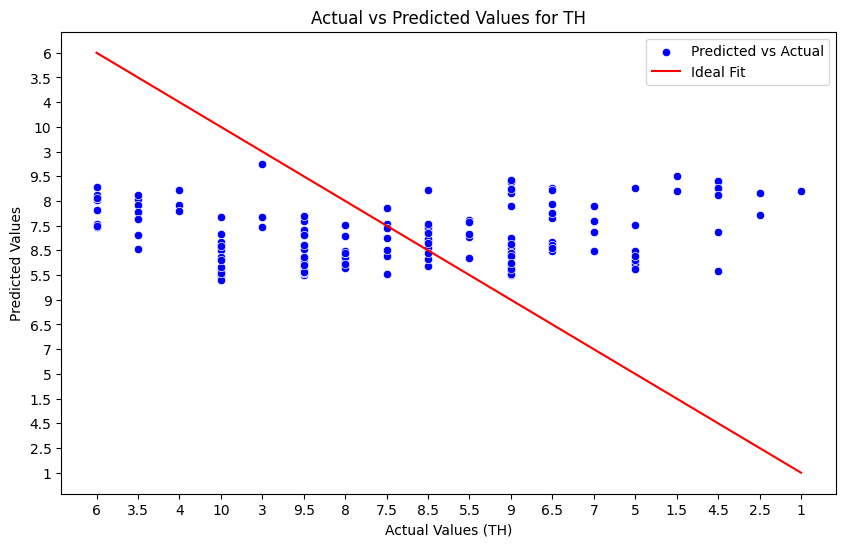

In [ ]:
# Vẽ đồ thị so sánh z_pred và z (giá trị thực tế)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
sns.lineplot(x=y_test, y=y_test, color='red', label='Ideal Fit')

plt.xlabel('Actual Values (TH)')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for TH')
plt.legend()
plt.show()

In [ ]:

y = model.predict(data_candudoan[['attend', 'attend_rate', 'avg_score', 'avg_submit', 'avg_finishtime (hour)']])



In [ ]:
data_candudoan.shape

(734, 7)

In [ ]:
y.shape

(734,)

In [ ]:
for i in range(734):
  row = data_candudoan.loc[i][1]
  print(f'{row}, {round(y[i],2)}')

0134f9f410c65ad0e8c2254a7e9288670e02a183, 6.07
035f97702f2c01d26ab1fae8f39ea2f98a0caa3c, 6.17
06024da8147b5cf6105beb4c403f67cf1ff0aea1, 6.03
0aaebc88f6106684d6993c156104c1ef36cf94e0, 6.31
0bf111a9caedf02804f6991792490e63bc21058a, 7.9
0d815307d5307124d148bbebfb41497230c4bd15, 8.27
0eb93817d6eb3d5bd3e44dbc75971eea193b924f, 7.06
12887fd9a4df4ba9b88a71f3fb1d2502a75995dd, 8.65
137ffd846ed245676a14f1d5e8676a4ef646182b, 4.93
138c5848f009c004f0b8e2379316d5ec18332ff8, 4.44
209d7c77e7a150b6990a3372f7cb24da0c0e7e07, 7.88
2383a9a33025aa8759fee9a890f6420df0fc8b47, 7.8
248ff20c10b7d18c30fc84ce214936f5bb440e6e, 4.8
2855b4b4d03c37c94117e615a25e0e321ec8d77a, 6.56
2fa311a94bc0da6d97955730d071ad6fcc770bfd, 7.18
326a025b5c23347b9eb2c5ceae75a5908a461f69, 5.46
339fff79c43561c995b29972a962ccec846c599f, 6.86
36dbfe4759f861ee72011812df2178cbbfd736a1, 6.12
39713cf2db02601e4bd6360ba70f8013c0433f48, 4.99
3d4f612148056feeb651f4711c1f640f5015101a, 7.0
410357eb9129023509cfaf8d38be61c050bb3b05, 5.53
4dcdd4c95ba887861

In [ ]:
results = pd.DataFrame({'username': data_candudoan['username'], 'predicted_score': y})

# Xuất kết quả ra file CSV mà không có header
results.to_csv('predicted_tbtl.csv', index=False, header=False)

print("Đã xuất file predicted_tbtl.csv thành công.")

Đã xuất file predicted_tbtl.csv thành công.
